In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from espn_api.baseball import League
from draft_scraper import get_draft_strategy
# Init
league = League(league_id=55646, year=2023, swid = '{8F5C0C75-0EC6-4CD4-9C0C-750EC64CD455}',
               espn_s2 = 'AEBvIL4Dlefi3KlVW0JH87iCDbcx0707HaHAXb8P3MgYzjwJWCk1xxdv5Jx7tR0CBOFRNPNOwgz1%2BwcsidB7tbVivNai4urRBeT%2FzXT59InIGYVeI8KHVfwy1eHZmQy%2FS5MDXM8caPu0seOzHhRF7PpYibmzCnmRCN4OBxBDrUEioqe%2BJsL93wEsl6ElDWE8Ff8laLi4MLZUbN6gQ1jFiCYdqwbmAOfCPIK%2Fe%2FnVRRdIoI5jpK82fUujjmoDqqkDj%2BTRTERwvpxvTx49B%2F3FKZCj9GzKr3N8dh46X%2FUermxajA%3D%3D')
league22 = League(league_id=55646, year=2022, swid = '{8F5C0C75-0EC6-4CD4-9C0C-750EC64CD455}',
               espn_s2 = 'AEBvIL4Dlefi3KlVW0JH87iCDbcx0707HaHAXb8P3MgYzjwJWCk1xxdv5Jx7tR0CBOFRNPNOwgz1%2BwcsidB7tbVivNai4urRBeT%2FzXT59InIGYVeI8KHVfwy1eHZmQy%2FS5MDXM8caPu0seOzHhRF7PpYibmzCnmRCN4OBxBDrUEioqe%2BJsL93wEsl6ElDWE8Ff8laLi4MLZUbN6gQ1jFiCYdqwbmAOfCPIK%2Fe%2FnVRRdIoI5jpK82fUujjmoDqqkDj%2BTRTERwvpxvTx49B%2F3FKZCj9GzKr3N8dh46X%2FUermxajA%3D%3D')

league21 = League(league_id=55646, year=2021, swid = '{8F5C0C75-0EC6-4CD4-9C0C-750EC64CD455}',
               espn_s2 = 'AEBvIL4Dlefi3KlVW0JH87iCDbcx0707HaHAXb8P3MgYzjwJWCk1xxdv5Jx7tR0CBOFRNPNOwgz1%2BwcsidB7tbVivNai4urRBeT%2FzXT59InIGYVeI8KHVfwy1eHZmQy%2FS5MDXM8caPu0seOzHhRF7PpYibmzCnmRCN4OBxBDrUEioqe%2BJsL93wEsl6ElDWE8Ff8laLi4MLZUbN6gQ1jFiCYdqwbmAOfCPIK%2Fe%2FnVRRdIoI5jpK82fUujjmoDqqkDj%2BTRTERwvpxvTx49B%2F3FKZCj9GzKr3N8dh46X%2FUermxajA%3D%3D')

league17 = League(league_id=55646, year=2017, swid = '{8F5C0C75-0EC6-4CD4-9C0C-750EC64CD455}',
               espn_s2 = 'AEBvIL4Dlefi3KlVW0JH87iCDbcx0707HaHAXb8P3MgYzjwJWCk1xxdv5Jx7tR0CBOFRNPNOwgz1%2BwcsidB7tbVivNai4urRBeT%2FzXT59InIGYVeI8KHVfwy1eHZmQy%2FS5MDXM8caPu0seOzHhRF7PpYibmzCnmRCN4OBxBDrUEioqe%2BJsL93wEsl6ElDWE8Ff8laLi4MLZUbN6gQ1jFiCYdqwbmAOfCPIK%2Fe%2FnVRRdIoI5jpK82fUujjmoDqqkDj%2BTRTERwvpxvTx49B%2F3FKZCj9GzKr3N8dh46X%2FUermxajA%3D%3D')
 

## Use espn_api to get the free agent and player list from the data

In [2]:
fa_list = (league.free_agents(size = 600))
rostered_list = []
rostered_list = rostered_list + league.get_team_data(1).roster + league.get_team_data(2).roster + league.get_team_data(3).roster + league.get_team_data(4).roster + league.get_team_data(5).roster + league.get_team_data(6).roster + league.get_team_data(7).roster + league.get_team_data(9).roster + league.get_team_data(10).roster + league.get_team_data(11).roster

players_list = fa_list + rostered_list
num_positions = []
names = []
ids = []
pos = []
for player in players_list:
    elig = player.eligibleSlots
    clean_elig = [val for val in elig if val not in ['BE', 'IL', 'UTIL', 'IF', 'OF', 'P']]
    names.append(player.name)
    ids.append(player.playerId)
    storable_name = '-'.join(clean_elig)
    pos.append(storable_name)
    num_positions.append(len(clean_elig))

pre_draft_rankings = get_draft_strategy(2022)


In [3]:
pre_draft_rankings

,id,pre_draft_ranking
0,39832,1
1,36969,2
2,32081,3
3,32801,4
4,39878,5
...,...,...
2995,41708,3905
2996,42543,3906
2997,4905919,3909
2998,39927,3910


## Turn the scraped data into data frames


In [16]:
names_df = pd.DataFrame(names)
id_df = pd.DataFrame(ids)
pos_df = pd.DataFrame(pos)
position_df = pd.concat([names_df, id_df, pos_df], axis = 1)
position_df.columns = ['name', 'PlayerId', 'position']
position_df_final = pd.merge(position_df, pre_draft_rankings, left_on = 'PlayerId', right_on='id', how = 'left')

## Read in maps and projections 

In [5]:
idmap = pd.read_csv('id_map.csv')
batc = pd.read_csv('batc_pr.csv')
batc2 = pd.read_csv('bat_atc_23.csv')

patc = pd.read_csv('patc_pr.csv')
idmap.columns

Index(['IDPLAYER', 'PLAYERNAME', 'BIRTHDATE', 'FIRSTNAME', 'LASTNAME', 'TEAM',
       'LG', 'POS', 'IDFANGRAPHS', 'FANGRAPHSNAME', 'MLBID', 'MLBNAME',
       'CBSID', 'CBSNAME', 'RETROID', 'BREFID', 'NFBCID', 'NFBCNAME', 'ESPNID',
       'ESPNNAME', 'KFFLNAME', 'DAVENPORTID', 'BPID', 'YAHOOID', 'YAHOONAME',
       'MSTRBLLNAME', 'BATS', 'THROWS', 'FANTPROSNAME', 'LASTCOMMAFIRST',
       'ROTOWIREID', 'FANDUELNAME', 'FANDUELID', 'DRAFTKINGSNAME', 'OTTONEUID',
       'HQID', 'RAZZBALLNAME', 'FANTRAXID', 'FANTRAXNAME', 'ROTOWIRENAME',
       'ALLPOS', 'NFBCLASTFIRST', 'ACTIVE', 'UNDERDOG'],
      dtype='object')

In [8]:
# Don't need these df's anymore because i'm storing possible positions in a column we can break apart later

#new_ids = pd.merge(position_df, idmap[['ESPNID', 'IDFANGRAPHS', 'FANTPROSNAME']], left_on='PlayerId', right_on='ESPNID', how = 'left')

# sp_df = new_ids.loc[new_ids.position == 'SP']
# rp_df = new_ids.loc[new_ids.position == 'RP']
# one_df = new_ids.loc[new_ids.position == '1B']
# two_df = new_ids.loc[new_ids.position == '2B']
# ss_df = new_ids.loc[new_ids.position == 'SS']
# three_df = new_ids.loc[new_ids.position == '3B']
# cornf_df = new_ids.loc[new_ids.position == '1B/3B']
# minf_df = new_ids.loc[new_ids.position == '2B/SS']
# c_df = new_ids.loc[new_ids.position == 'C']
# left_df = new_ids.loc[new_ids.position == 'LF']
# center_df = new_ids.loc[new_ids.position == 'CF']
# right_df = new_ids.loc[new_ids.position == 'RF']
# dh_df = new_ids.loc[new_ids.position == 'DH']

# sp_df = new_ids.loc[new_ids.position == 'SP']
# rp_df = new_ids.loc[new_ids.position == 'RP']

In [17]:
batter1 = pd.merge(batc, idmap[['ESPNID', 'ESPNNAME', 'IDFANGRAPHS', 'FANTPROSNAME']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
batter = pd.merge(batter1, position_df_final, left_on='ESPNNAME', right_on='name', how = 'left')

# b1p = pd.merge(batc, one_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# b2p = pd.merge(batc, two_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# ssp = pd.merge(batc, ss_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# b3p = pd.merge(batc, three_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# cornfp = pd.merge(batc, cornf_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# minfp = pd.merge(batc, minf_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# cp = pd.merge(batc, c_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# leftp = pd.merge(batc, left_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# rightp = pd.merge(batc, right_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# centerp = pd.merge(batc, center_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# dhp = pd.merge(batc, dh_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')

# b1r = pd.merge(batc2, one_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# b2r = pd.merge(batc2, two_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# ssr = pd.merge(batc2, ss_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# b3r = pd.merge(batc2, three_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# cornfr = pd.merge(batc2, cornf_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# minfr = pd.merge(batc2, minf_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# cr = pd.merge(batc2, c_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# leftr = pd.merge(batc2, left_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# rightr = pd.merge(batc2, right_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# centerr = pd.merge(batc2, center_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# dhr = pd.merge(batc2, dh_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')

pitcher1 = pd.merge(patc, idmap[['ESPNID', 'ESPNNAME', 'IDFANGRAPHS', 'FANTPROSNAME']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
pitcher = pd.merge(pitcher1, position_df_final, left_on='ESPNNAME', right_on='name', how = 'left')
# spp = pd.merge(patc, sp_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')
# rpp = pd.merge(patc, rp_df[['position', 'IDFANGRAPHS']], left_on='PlayerId', right_on='IDFANGRAPHS', how = 'inner')



In [164]:
# def zscore(df):
#     mean_pr_pos = np.mean(df.pr)
#     std_pr_pos = np.std(b1p.pr)
#     exes = df.pr
#     temp = []
#     weighted_pr = []
#     for player in exes:
#         z = (player - mean_pr_pos) / std_pr_pos
#         composite = z + player
#         weighted_pr.append(composite)
#         temp.append(z)
#     scores = pd.DataFrame(temp)
#     weighted = pd.DataFrame(weighted_pr)
#     scores.columns = ['pr_pos']
#     weighted.columns = ['weighted_pr']
#     final = pd.concat([df, scores, weighted], axis = 1)
#     return final
    

In [165]:
# weighted_1 = zscore(b1p)
# weighted_2 = zscore(b2p)
# weighted_3 = zscore(b3p)
# weighted_ss = zscore(ssp)
# weighted_cp = zscore(cp)
# weighted_lf = zscore(leftp)
# weighted_rf = zscore(rightp)
# weighted_cf = zscore(centerp)
# weighted_dhp = zscore(dhp)

# weighted_list = [weighted_1, weighted_2, weighted_3, weighted_ss, weighted_cp, weighted_lf, weighted_rf, weighted_cf,
#                 weighted_dhp]

# unweighted_list = [b1p, b2p, b3p, ssp, cp, leftp, rightp, centerp, dhp]

# raw_list = [b1r, b2r, b3r, ssr, cr, leftr, rightr, centerr, dhr]

# raw_list_pit = [spp, rpp]

In [45]:
# #off_limits = ['18401', '18345', '19612', '11737', '13624', '15429', '15998', 'sa3011225', '13125']
# # These are the id's of the fourth-keepers
# comb = pd.concat(unweighted_list, ignore_index = True)
# comb_unique = comb.drop_duplicates('PlayerId', keep = 'first')
# comb_sorted = comb_unique.sort_values("pr", ascending = False)
# #comb_sorted = comb_sorted.loc[~comb_sorted.PlayerId.isin(off_limits)]
# comb_sorted.reset_index()

# comb_pit = pd.concat(raw_list_pit, ignore_index = True)
# comb_unique_pit = comb_pit.drop_duplicates('PlayerId', keep = 'first')
# comb_sorted_pit = comb_unique_pit.sort_values("pr", ascending = False)
# #comb_sorted_pit = comb_sorted_pit.loc[~comb_sorted_pit.PlayerId.isin(off_limits)]
# comb_sorted_pit.reset_index()

# ovr = pd.concat([comb_sorted.reset_index(drop = True), comb_unique_pit.reset_index(drop = True)], ignore_index = True)
# # Change ohtani's pr to be the sum of his two positions
# # change his pitcher columns to be the pitcher options
# shohei_sp = (ovr.loc[(ovr['Name'] == 'Shohei Ohtani') & (ovr['position'] == 'SP')]).iloc[:, 17:]
# shohei_dh = (ovr.loc[(ovr['Name'] == 'Shohei Ohtani') & (ovr['position'] == 'DH')]).iloc[:, 1:17]
# shohei_comb = pd.concat([shohei_dh.reset_index(drop = True), shohei_sp.reset_index(drop = True)], axis = 1)
# shohei_comb.loc[0, 'pr'] = sum(ovr.loc[(ovr['Name'] == 'Shohei Ohtani'), 'pr'])

# ovr_temp = pd.concat([shohei_comb.reset_index(drop = True), ovr.reset_index(drop = True)])
# ovr_sorted = ovr_temp.sort_values("pr", ascending = False).drop_duplicates('PlayerId', keep = 'first')
# #ovr_sorted = ovr_sorted.loc[~ovr_sorted.PlayerId.isin(off_limits)]
# ovr_sorted.reset_index(drop = True)

ovr = pd.concat([batter.reset_index(drop = True), pitcher.reset_index(drop = True)], ignore_index = True)
# Change ohtani's pr to be the sum of his two positions
# change his pitcher columns to be the pitcher options
shohei_sp = (ovr.loc[(ovr['Name'] == 'Shohei Ohtani') & (ovr['position'] == 'SP')]).iloc[:, 17:]
shohei_dh = (ovr.loc[(ovr['Name'] == 'Shohei Ohtani') & (ovr['position'] == 'DH')]).iloc[:, 1:17]
shohei_comb = pd.concat([shohei_dh.reset_index(drop = True), shohei_sp.reset_index(drop = True)], axis = 1)
shohei_comb.loc[0, 'pr'] = sum(ovr.loc[(ovr['Name'] == 'Shohei Ohtani'), 'pr'])

ovr_temp = pd.concat([shohei_comb.reset_index(drop = True), ovr.reset_index(drop = True)])
ovr_sorted = ovr_temp.sort_values("pr", ascending = False).drop_duplicates('IDFANGRAPHS', keep = 'first').reset_index(drop = True)
#ovr_sorted = ovr_sorted.loc[~ovr_sorted.PlayerId.isin(off_limits)]
ovr_sorted.to_csv('final_cleaned_data.csv')


In [19]:
ovr_sorted.columns

Index(['Name', 'Team', 'PlayerId_x', 'AB', 'wAVG', 'wOPS', 'AVG', 'OPS', 'R',
       'HR', 'RBI', 'RC', 'pr', 'rank', 'ESPNID', 'ESPNNAME', 'IDFANGRAPHS',
       'FANTPROSNAME', 'name', 'PlayerId_y', 'position', 'id',
       'pre_draft_ranking', 'IP', 'SO', 'QS', 'ERA', 'WHIP', 'SVHD', 'pos',
       'Unnamed: 0'],
      dtype='object')

In [ ]:
long_pos = pd.get_dummies(comb_raw, columns = ['position'])
long_pos.columns

Index(['Unnamed: 0', 'Name', 'Team', 'playerid', 'R', 'HR', 'RBI', 'RC', 'AVG',
       'OPS', 'IDFANGRAPHS', 'position_1B', 'position_2B', 'position_3B',
       'position_C', 'position_CF', 'position_DH', 'position_LF',
       'position_RF', 'position_SS'],
      dtype='object')

In [ ]:
others = ['position_1B', 'position_2B', 'position_3B', 'position_C', 'position_CF', 'position_DH',
               'position_LF', 'position_RF', 'position_SS']
indentifiers = ['Unnamed: 0', 'Name', 'Team', 'PlayerId', 'R', 'HR', 'RBI', 'RC', 'AVG',
          'OPS', 'pr', 'IDFANGRAPHS', 'pr_pos', 'weighted_pr']
agg_long_pos = long_pos.groupby(['PlayerId', 'Name']).sum([others])

In [ ]:
agg_long_pos

In [ ]:
# comb_sorted.to_csv('comb_sorted.csv')
agg_long_pos.to_csv('pos_raw.csv')
comb_sorted_pit.to_csv('comb_sorted_pit.csv')
agg_long_pos.to_csv('comb2.csv')
ovr_sorted.to_excel('ovr_sorted.xlsx')

# Graphs

In [21]:
ovr_sorted.columns

Index(['Name', 'Team', 'PlayerId_x', 'AB', 'wAVG', 'wOPS', 'AVG', 'OPS', 'R',
       'HR', 'RBI', 'RC', 'pr', 'rank', 'ESPNID', 'ESPNNAME', 'IDFANGRAPHS',
       'FANTPROSNAME', 'name', 'PlayerId_y', 'position', 'id',
       'pre_draft_ranking', 'IP', 'SO', 'QS', 'ERA', 'WHIP', 'SVHD', 'pos',
       'Unnamed: 0'],
      dtype='object')

In [44]:
ovr.loc[ovr.position.isna()]

,Unnamed: 0,Name,Team,PlayerId_x,AB,wAVG,wOPS,AVG,OPS,R,...,position,id,pre_draft_ranking,IP,SO,QS,ERA,WHIP,SVHD,pos
17,22,Ronald Acuña Jr.,ATL,18401,535.0,1.582561,1.786388,1.034267,1.970767,2.352887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,42,Nathaniel Lowe,TEX,19566,545.0,1.663789,1.630284,1.145883,0.989885,0.851904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,53,Nick Castellanos,PHI,11737,544.0,1.563472,1.490084,0.715845,0.378118,0.736444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,76,Andrew Vaughn,CHW,26197,529.0,1.464400,1.395339,0.640761,0.311380,0.390063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,74,Jazz Chisholm Jr.,MIA,20454,497.0,1.091316,1.247531,-0.339221,0.425780,1.025095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,113,Lourdes Gurriel Jr.,ARI,19238,498.0,1.462344,1.215371,1.477674,0.239365,-0.071778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,161,Tyrone Taylor,MIL,13675,429.0,0.657405,0.751012,-0.838487,-0.325955,-0.360428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,149,Cal Raleigh,SEA,21534,409.0,0.422043,0.678519,-1.668301,-0.150006,-0.533619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,148,Spencer Torkelson,DET,27465,458.0,0.772065,0.873768,-0.987464,-0.458545,-0.244968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,204,Gio Urshela,LAA,10681,385.0,0.684784,0.534065,0.723566,-0.283794,-0.822269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
[ovr.position.str.split('-')[i][0] for i in range(0, 300)]

TypeError: 'float' object is not subscriptable

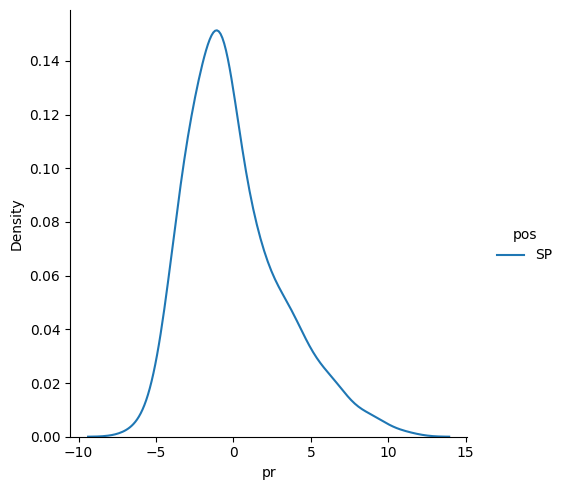

In [26]:
sns.displot(ovr_sorted, x="pr", hue="pos", kind = "kde")

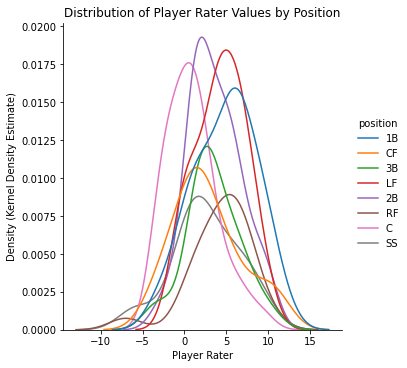

In [ ]:
p = sns.displot(ovr_sorted.loc[~ovr_sorted.position.isin(['SP', 'RP', 'DH'])], x="pr", hue="position",
            kind = "kde").set(title='Distribution of Player Rater Values by Position', xlabel = 'Player Rater',
                             ylabel = "Density (Kernel Density Estimate)")
plt.savefig('pr_v_pos.png', facecolor = 'white', dpi = 150, bbox_inches='tight')